#Proyek Pertama
#Nama : Lalu Ardita Arip
#SIB ID : M302X0788
#Email : ardita.arip18@gmail.com
#Email :M302X0788@dicoding.org
#alamat : Lombok Timur, NTB
#kode kelas : M-08

link dataset :https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction

melakukan loading data agar data lebih mudah diproses

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import  OneHotEncoder

In [ ]:
data = pd.read_csv('ford.csv')
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


dari data diatas diproleh ada 17.966 baris dalam dataset, dan terdapat 9 kolom yang terdiri dari kolom: model,	year,	price,	transmission,	mileage,	fuelType,	tax,	mpg,	engineSize

In [ ]:
# melihat informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


dari informasi diatas diperoleh informasi bahwa: 3 kolom objek yang merupkan kategorikal fitur. 2 kolom float64 ynag merupakan fitur numerik yang dilakukan dengan pengukuran. dan 4 kolom int64 yang didalamnya terdapat target yang akan kita ukur 

In [ ]:
# mengecek deskripsi statistik data
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


dari fungsi diatas kita dapat menerima informasi statistik pada masing-masing kolom 

In [ ]:
mileage = (data.mileage == 0).sum()
tax = (data.tax == 0).sum()
mpg = (data.mpg == 0).sum()
engineSize = (data.engineSize == 0).sum()
 
print("Nilai 0 di kolom mileage ada: ", mileage)
print("Nilai 0 di kolom tax ada: ", tax)
print("Nilai 0 di kolom mpg ada: ", mpg)
print("Nilai 0 di kolom engineSize ada: ", engineSize)

Nilai 0 di kolom mileage ada:  0
Nilai 0 di kolom tax ada:  2153
Nilai 0 di kolom mpg ada:  0
Nilai 0 di kolom engineSize ada:  51


sebelum memperoses datanya lebih lanjut kita terlebih dahulu harus melakukan pemeriksaan terhadap missing value, kaliini kita akan memerikas missing value pada kolom mileage, tax, mpg, dan engineSize

In [ ]:
data.loc[(data['tax']==0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12,Fiesta,2017,11000,Manual,20978,Petrol,0,65.7,1.0
24,Fiesta,2014,6795,Manual,35299,Petrol,0,65.7,1.0
27,Fiesta,2015,8299,Manual,25935,Petrol,0,65.7,1.0
30,Fiesta,2016,7999,Manual,60730,Diesel,0,78.5,1.5
33,Fiesta,2013,7236,Manual,39090,Petrol,0,65.7,1.0
...,...,...,...,...,...,...,...,...,...
17877,Fiesta,2015,6900,Manual,37000,Petrol,0,65.7,1.0
17938,Fiesta,2015,8499,Manual,9264,Petrol,0,65.7,1.0
17942,Focus,2015,8000,Manual,65000,Diesel,0,74.3,1.5
17946,Fiesta,2015,8999,Manual,24546,Petrol,0,65.7,1.0


melakukan pengecekan data pada kolom tax, apakah data bernilai 0 terdapat pula pada dimensilainnya

In [ ]:
# Drop baris dengan nilai 'mileage','tax','mpg','engineSize' = 0
data = data.loc[(data[['mileage','tax','mpg','engineSize']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
data.shape

(15769, 9)

menghilangkan/menghapus baris bernilai 0 sehingga baris/data berupabah menjadi 15.769

In [ ]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,15769.000000,15769.000000,15769.000000,15769.000000,15769.000000,15769.000000
mean,2017.028474,12765.454373,22118.598833,128.766694,56.319069,1.374291
std,2.087784,4822.444810,19286.816279,48.817855,9.492498,0.441691
min,1996.000000,495.000000,1.000000,20.000000,20.800000,1.000000
25%,2016.000000,9545.000000,9247.000000,145.000000,51.400000,1.000000
50%,2017.000000,11995.000000,16819.000000,145.000000,57.700000,1.200000
75%,2018.000000,15899.000000,29469.000000,145.000000,62.800000,1.600000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


memastikan tidak ada missing value pada dataset tersebut.

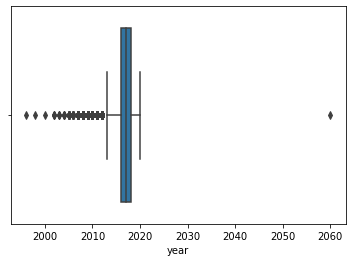

In [ ]:
sns.boxplot(x=data['year'])

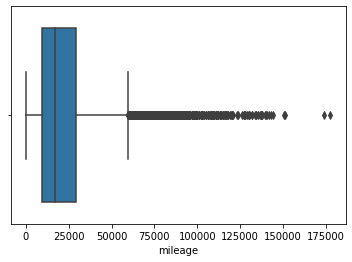

In [ ]:
sns.boxplot(x=data['mileage'])

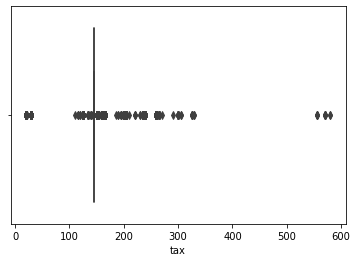

In [ ]:
sns.boxplot(x=data['tax'])

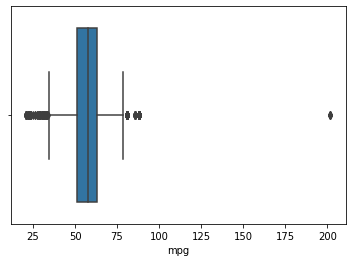

In [ ]:
sns.boxplot(x=data['mpg'])

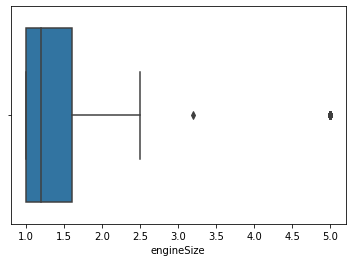

In [ ]:
sns.boxplot(x=data['engineSize'])

melakuakan visualisasi pada dataset dengan menggunkan boxplot untuk mendeteksi outliers pada fitur numerik

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(8401, 9)

membuat batasan pada dataset dengan membuat batas atas dan batas bawah. setelah membuat batas atas dan bawah sekarang kita memiliki dataset yang berseih  dengan memiliki 8.401 sampel.

In [ ]:
numerical_features = ['year',	'price',	'mileage',	'tax',	'mpg',	'engineSize']
categorical_features = ['model', 'transmission', 'fuelType']

melakukan analisis dengan menggunakan teknik Univariate EDA, langakah pertama yang kita lakukan dengan car amembagi dua dataset menjadi fitur numrikal dan kategorikal.

categorical features


                        jumlah sampel  persentase
 Fiesta                          3122        37.2
 Focus                           2327        27.7
 Kuga                            1230        14.6
 EcoSport                         587         7.0
 Ka+                              407         4.8
 Mondeo                           154         1.8
 S-MAX                            102         1.2
 C-MAX                             86         1.0
 B-MAX                             84         1.0
 Galaxy                            78         0.9
 Puma                              60         0.7
 Edge                              47         0.6
 Grand C-MAX                       45         0.5
 Grand Tourneo Connect             24         0.3
 KA                                19         0.2
 Tourneo Custom                    15         0.2
 Tourneo Connect                   13         0.2
 Mustang                            1         0.0


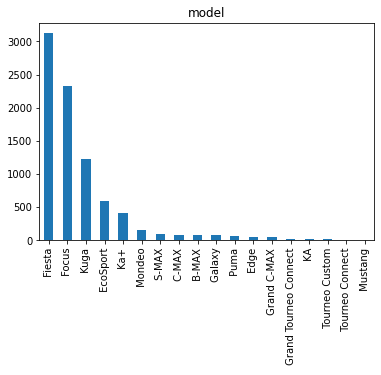

In [ ]:
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

terdapat 18 kategori pada fitur model dengan persentasi fiesat dengan model terbanyak dan musatang merupakan model dengan persentasi paling sedikit

           jumlah sampel  persentase
Manual              7290        86.8
Automatic            639         7.6
Semi-Auto            472         5.6


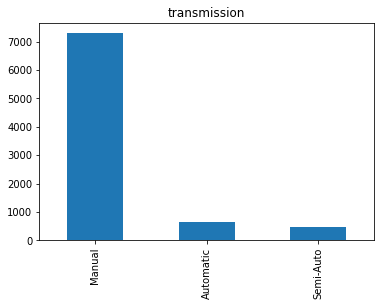

In [ ]:
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

pada transmission terdapat transmission manual, automatic dan semi-auto, dengan manual memiliki persentasi paling tinggi.

        jumlah sampel  persentase
Petrol           6243        74.3
Diesel           2156        25.7
Hybrid              2         0.0


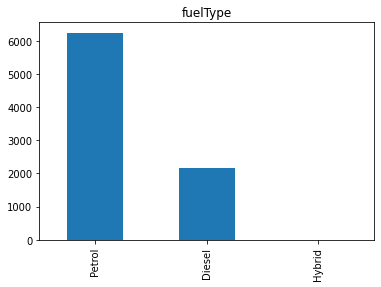

In [ ]:
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

pada tipe bahan bakar terdiri dari petrol, diesel dan hybrid. dan dengan penggunaan bahan bakara petrol yang paling banyak.

numrical features

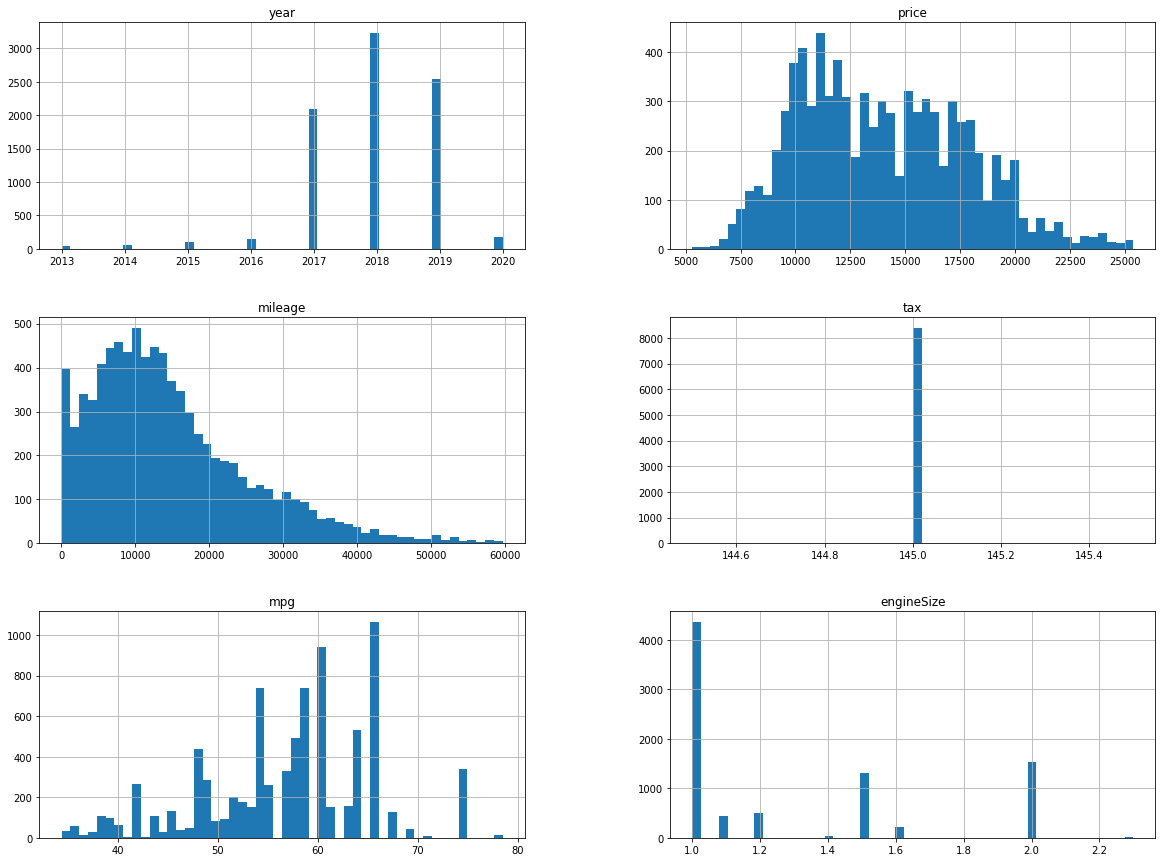

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

yang menjadi fokus utama kita pada lebel harga. sehingga dari histogram tersebut kita mendapat beberapa informasi seperti rentang harga mobil, dan jumlah unit dengan harga demikian

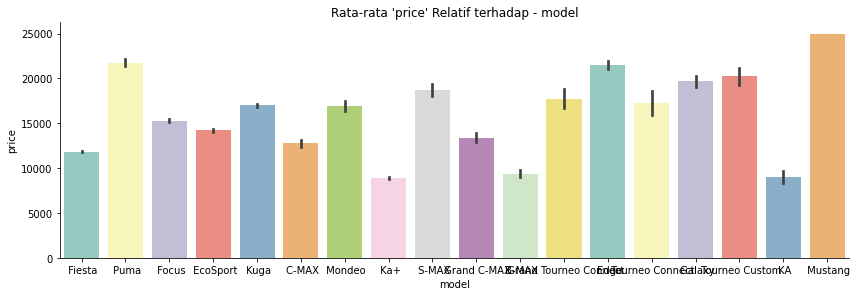

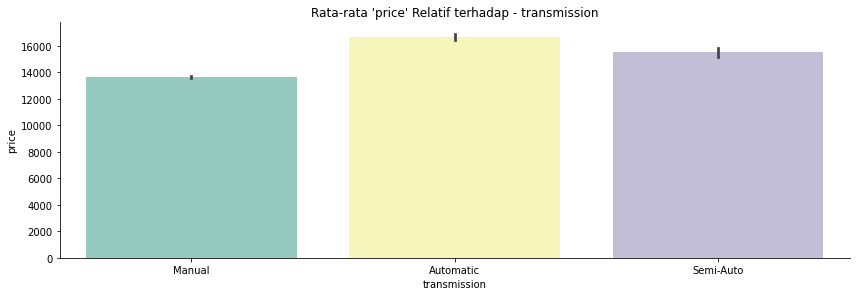

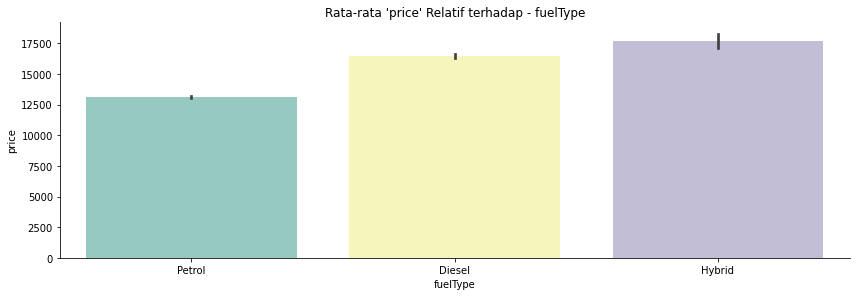

In [ ]:
cat_features = data.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

dari catplot diatas kita dapat melihat pengaruh fitur kategori terhadap harga mobil tersebut. misalkan mustang merupakan model dengan harga rata-rata termahal, dan tranmisi automatic merupakan rata-rata tranmisis termalah serta type bahan abakar hybrid/campuran merupakan bahan bakar dengan harga rata-rata termahal.

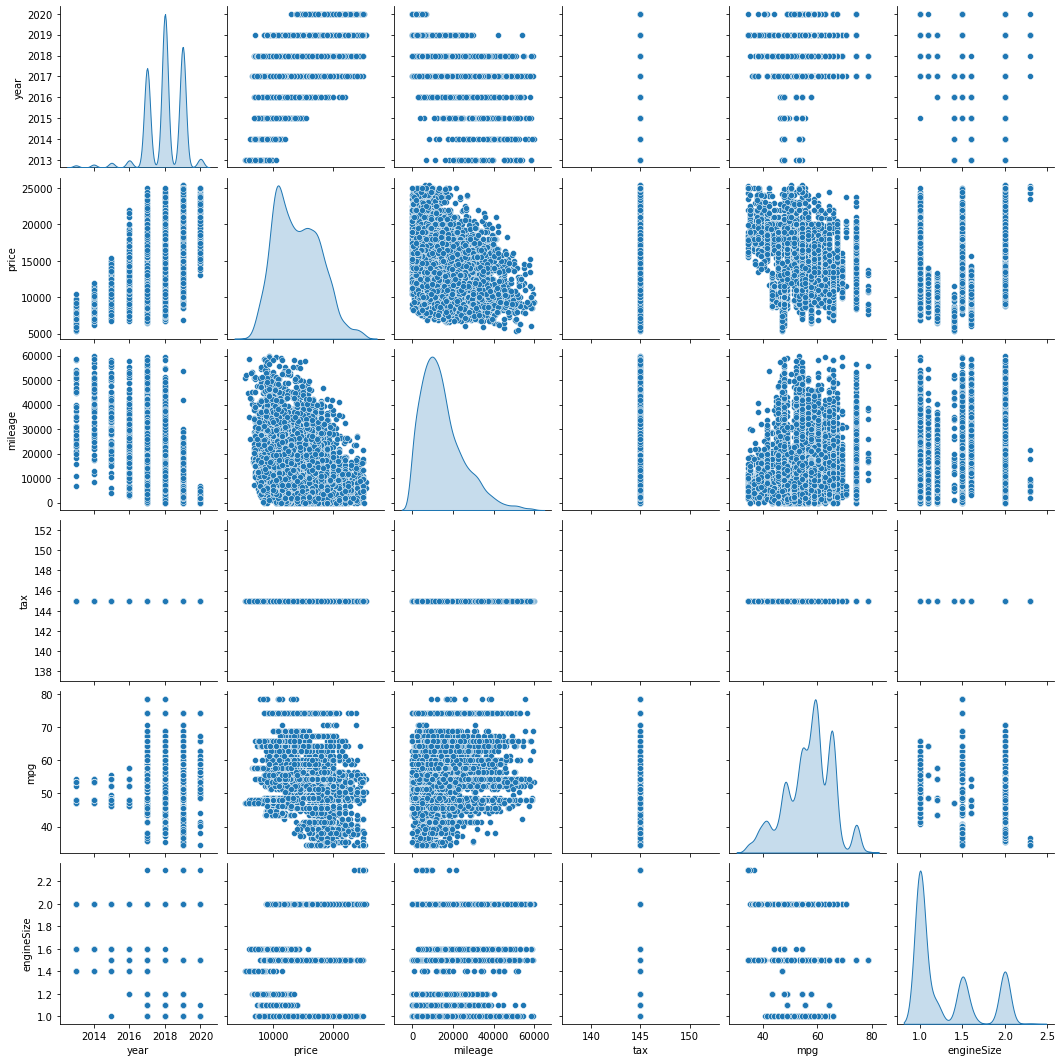

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(data, diag_kind = 'kde')

dengan pairplot diatas kita dapat melihat relasi pasangan dalam dataset kita.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

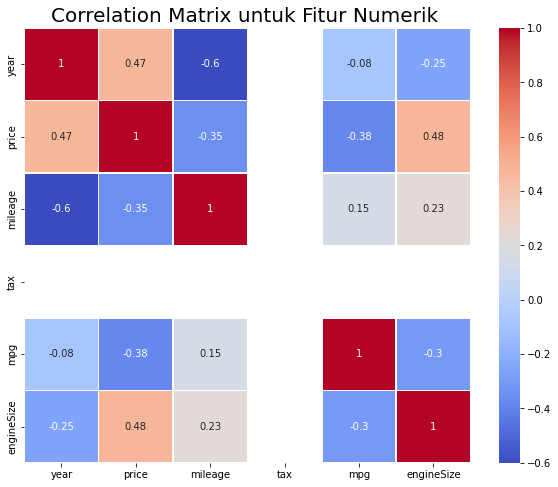

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

dari corelasi diatas dapat kita lihat bahawa koralasi antara harga dan mpg merupakan korelasi dengan tingkat paling rendah.

In [ ]:
data.drop(['mpg'], inplace=True, axis=1)
data.head()

,model,year,price,transmission,mileage,fuelType,tax,engineSize
3,Fiesta,2019,17500,Manual,10460,Petrol,145,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,145,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,145,1.2


karena korelasi dengan mpg merupakan yang terendah fitur mpg dapat di hapus.

In [ ]:
data = pd.concat([data, pd.get_dummies(data['model'], prefix='model')],axis=1)
data = pd.concat([data, pd.get_dummies(data['transmission'], prefix='transmission')],axis=1)
data = pd.concat([data, pd.get_dummies(data['fuelType'], prefix='fuelType')],axis=1)
data.drop(['model', 'transmission', 'fuelType'], axis=1, inplace=True)
data.head()

,year,price,mileage,tax,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Fiesta,...,model_ Puma,model_ S-MAX,model_ Tourneo Connect,model_ Tourneo Custom,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
3,2019,17500,10460,145,1.5,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,2019,16500,1482,145,1.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
5,2015,10500,35432,145,1.6,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
6,2019,22500,2029,145,1.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
7,2017,9000,13054,145,1.2,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


melakukan peroses encoding pada fitur kategori agar mendapat fitur baru. peroses encoding kali ini menggunakan fitur get_dummies

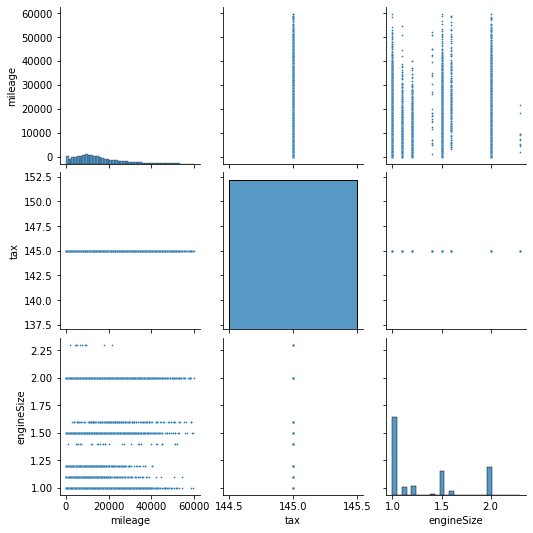

In [ ]:
sns.pairplot(data[['mileage','tax','engineSize']], plot_kws={"s": 3});

setelah melakukan pengecekan menggunakan fungsi pairplot ketiga fitur tersebut memiliki korelasi yang rendah karena mengandung informasi yang berbeda.

In [ ]:
pca = PCA(n_components=3, random_state=123)
pca.fit(data[['mileage','tax','engineSize']])
princ_comp = pca.transform(data[['mileage','tax','engineSize']])

mengapilkasikan celas PCA dari library scikit learn.

In [ ]:
pca.explained_variance_ratio_.round(3)

array([1., 0., 0.])

dari class PCA kita bisi mengetahui proforsi informasi dari ketiga informasi. dan berdasarkan informasi tersebut kita akan mereduksi komponen JPU dan mempertahankan komponen pertama saja.

In [ ]:
pca = PCA(n_components=1, random_state=123)
pca.fit(data[['mileage','tax','engineSize']])
data['JPU'] = pca.transform(data.loc[:, ('mileage','tax','engineSize')]).flatten()
data.drop(['mileage','tax','engineSize'], axis=1, inplace=True)

disini kita membuat fitur baru yaitu JPU yang merupakan gabungan dari fitur 'mileage','tax','engineSize'

In [ ]:
X = data.drop(["price"],axis =1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 8401
Total # of sample in train dataset: 6720
Total # of sample in test dataset: 1681


membagi dataset menjadi data latih dan data uji agar lebih mempermudah dengan perbandingan 80:20 dengan fungsi train_test_split dari sklearn.

In [ ]:
numerical_features = ['year', 'JPU']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,year,JPU
1984,0.992321,-1.371358
14715,0.992321,0.030371
8506,0.992321,-0.109867
3148,-0.938029,1.131803
3675,0.027146,0.113673


menerapkan StandardScaler pada data. 

In [ ]:
X_train[numerical_features].describe().round(4)

,year,JPU
count,6720.0000,6720.0000
mean,0.0000,-0.0000
std,1.0001,1.0001
min,-4.7987,-1.3719
25%,-0.9380,-0.7252
50%,0.0271,-0.2066
75%,0.9923,0.4982
max,1.9575,4.2096


standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train) 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

dengan menggunakan KNN dengan menggunakan K=10 tetangga dan metric Euclidean untuk mengukur jarak antara titik.

In [ ]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train) 

lalu kita menggunakan random forest ynag dimana algoritma ini disiusun dari banyak decision tree ynag dimana pembagian data dan fiturnya dipilih secara acak.

In [ ]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

menggunakan boosting ynag dimana tkehnik ini melatih model seacra berurutan atau dalam proses yag iteratif

selajutnya tahap evalusai

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

terlebih dahulu kita melakukan scaling agar sekala antara data uji dan data latih sama dan dapat dilakukan evaluasi

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
# Panggil mse
mse

,train,test
KNN,2618.263427,3792.611371
RF,1273.750677,3863.671416
Boosting,6004.249221,6416.680764


melakukan evaluasi pada ketiga model dengan matrik MSE

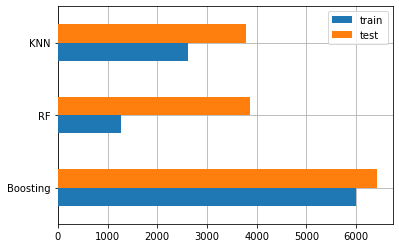

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

agar lebih mempermudah gunkana visualisasi menggunakan barchart

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict[name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,KNN,RF,Boosting
4679,9750,9885.4,9991.1,11013.6


dari hasil diats terlihat bahwa perdiksi dengan menggunakan KNN lebih mendekati 